In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [2]:

# Load the data
county_galway = pd.read_csv("data/dly1875_galway-athenry.csv")
county_galway["date"] = pd.to_datetime(county_galway["date"])
county_galway = county_galway[(county_galway["date"].dt.year >= 2013) & (county_galway["date"].dt.year <= 2023)]


C:\Users\meatefza\AppData\Local\Temp\ipykernel_42892\3039004541.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  county_galway["date"] = pd.to_datetime(county_galway["date"])


In [3]:
county_galway = county_galway.loc[:, ~county_galway.columns.str.startswith(('ind', 'file','igmin'))]

In [4]:
import pandas as pd
import numpy as np
import re

# Function to replace NaN values and occurrences of r'\s+' with mean value of the column for the month and year of the date related to that row
def replace_nan_and_whitespace_with_mean(df):
    for column in df.columns:
        if column != 'date':
            # Replace occurrences of r'\s+' with NaN
            df[column] = df[column].apply(lambda x: x if not (isinstance(x, str) and re.search(r'\s+', x)) else np.nan)
            # Ensure all values are numeric
            df[column] = pd.to_numeric(df[column], errors='coerce')
            # Replace NaN values with mean value of the column for the month and year of the date related to that row, approximated to the first decimal number
            df[column] = df.apply(lambda row: row[column] if not pd.isna(row[column]) else round(df[(df['date'].dt.year == row['date'].year) & (df['date'].dt.month == row['date'].month)][column].mean(), 1), axis=1)
            # Round all float numbers to the first decimal point
            df[column] = df[column].round(1)
    return df

# Replace NaN values and occurrences of r'\s+' with mean values
county_carlowoakpark = replace_nan_and_whitespace_with_mean(county_galway)

#filtered_df = county_galwaynew.query("date == '2013-07-10' or date == '2013-05-14' or date == '2013-07-11'")

#print(filtered_df)


In [5]:
county_galway = county_galway.loc[:, ~county_galway.columns.str.startswith(('ind', 'file','igmin'))]

In [6]:
county_galway[["glorad","hm","ddhm"]] = county_galway[["glorad","hm","ddhm"]].astype("int64")
# Convert multiple columns to float data type
columns_to_convert = ["gmin", "rain", "cbl", "wdsp", "soil", "pe", "evap", "smd_wd", "smd_md", "smd_pd"]
county_galway[columns_to_convert] = county_galway[columns_to_convert].astype(float)


In [7]:
print(county_galway.dtypes)

date      datetime64[ns]
maxtp            float64
mintp            float64
gmin             float64
rain             float64
cbl              float64
wdsp             float64
hm                 int64
ddhm               int64
hg                 int64
soil             float64
pe               float64
evap             float64
smd_wd           float64
smd_md           float64
smd_pd           float64
glorad             int64
dtype: object


In [8]:
county_galway.to_parquet('county_galway.parquet')

In [9]:
county_galway.head()

date  maxtp  mintp  gmin  rain     cbl  wdsp  hm  ddhm  hg  soil  \
1040 2013-01-01    8.3    1.4  -1.3   0.7  1005.1   6.6  14   270  20   5.0   
1041 2013-01-02   11.1    7.1   1.6   3.1  1016.8  11.2  18   230  25   7.8   
1042 2013-01-03   11.3   10.4   9.8   3.3  1024.8   9.2  14   220  22   9.1   
1043 2013-01-04   10.9    9.1   8.2   0.0  1026.4   7.5  14   170  22   8.7   
1044 2013-01-05   12.0    4.9   6.7   1.5  1022.8   7.7  15   230  24   8.3   

       pe  evap  smd_wd  smd_md  smd_pd  glorad  
1040  0.0   0.0     NaN     NaN     NaN     284  
1041  0.2   0.3     NaN     NaN     NaN      83  
1042  0.3   0.4     NaN     NaN     NaN      92  
1043  0.4   0.5     NaN     NaN     NaN     110  
1044  0.1   0.2     NaN     NaN     NaN     116

Rainfall Amount Prediction Using LSTM


Training and evaluating model with 7 days of previous rain data:


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


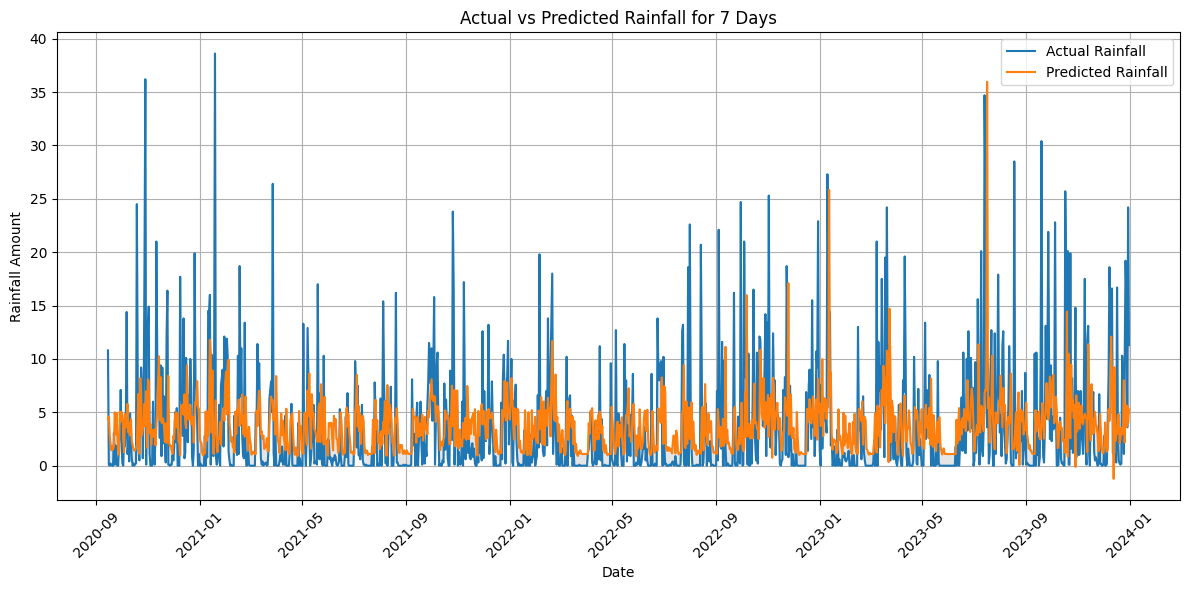


Training and evaluating model with 14 days of previous rain data:


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


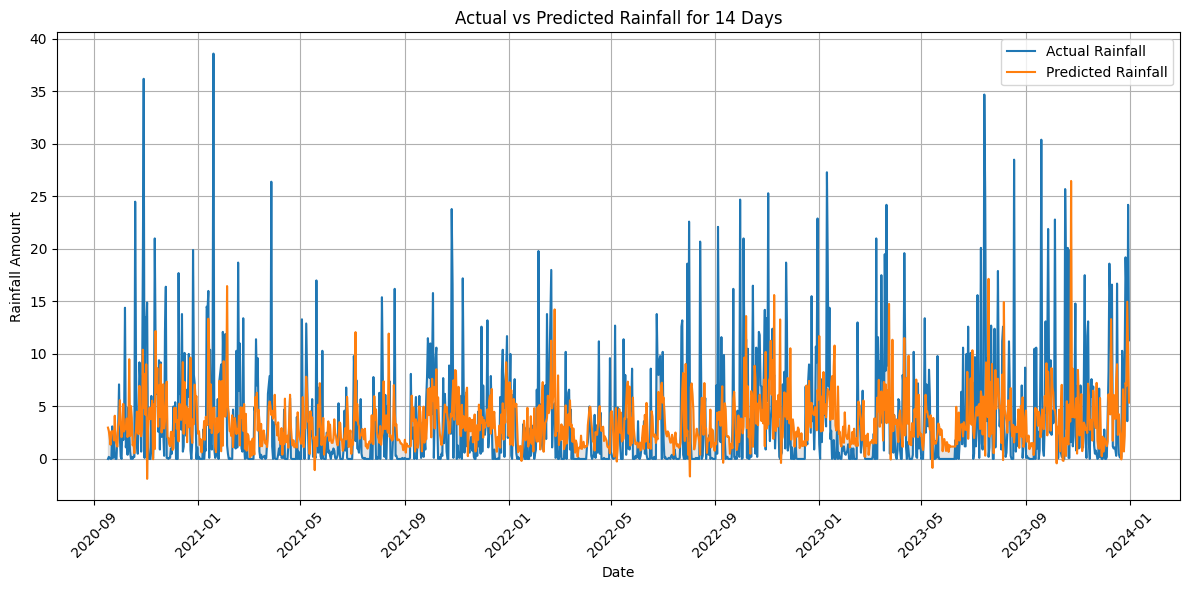


Training and evaluating model with 21 days of previous rain data:


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


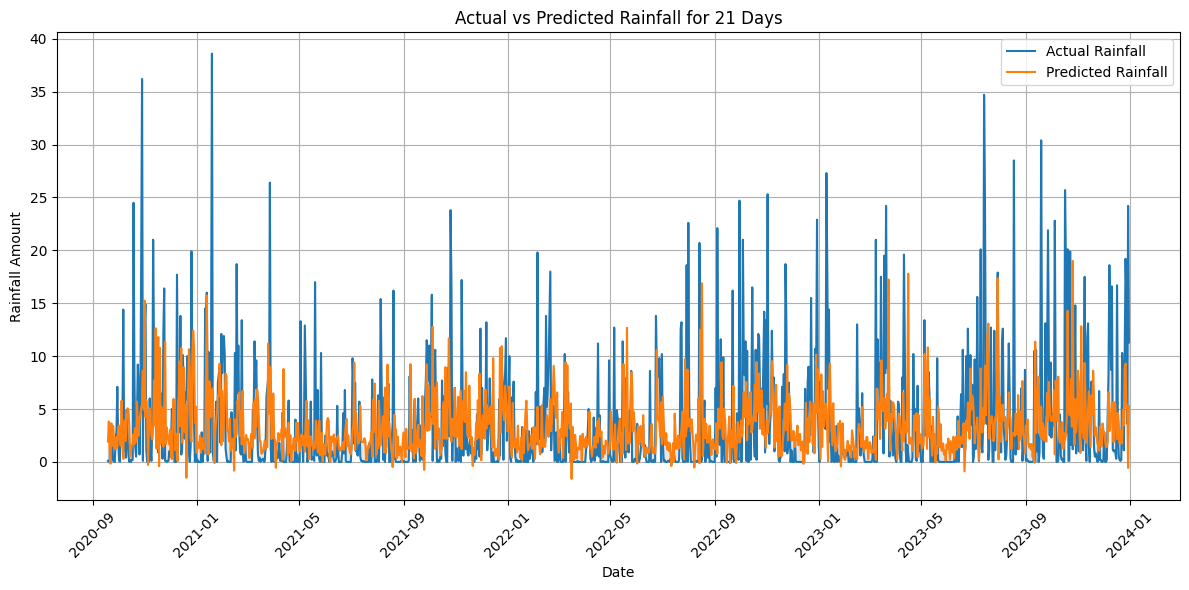


Training and evaluating model with 28 days of previous rain data:


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


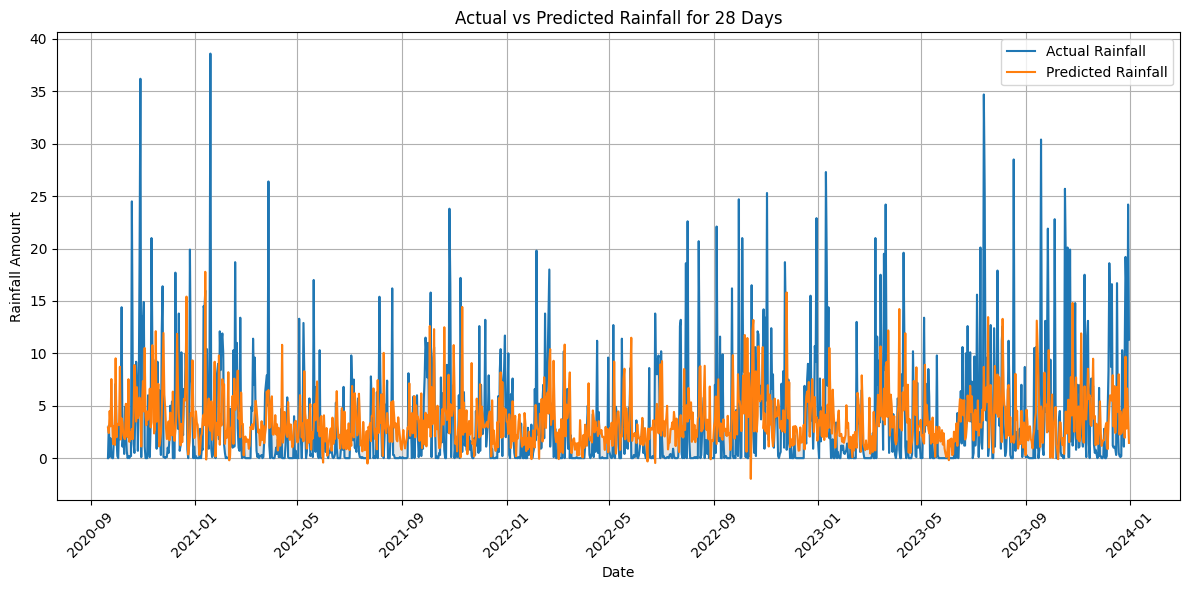

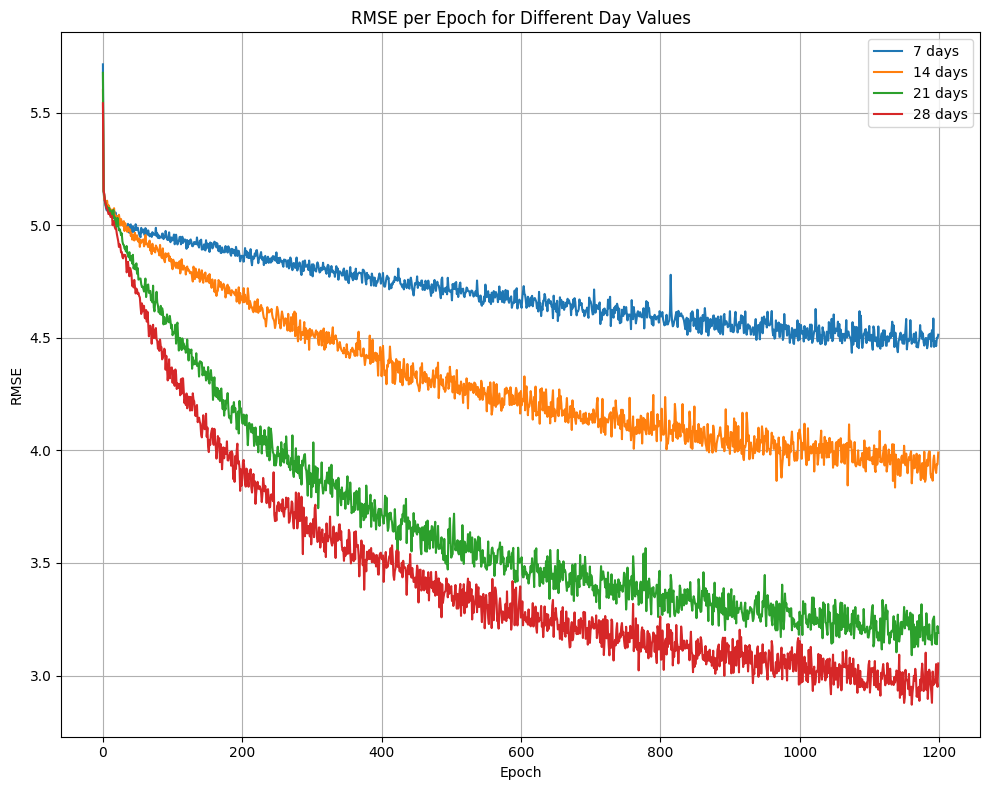

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Initialize a dictionary to store RMSE values for each 'days' value
rmse_per_epoch_per_days = {}

def train_and_evaluate_model(days, original_df):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days+1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days+1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    X_train = train_data[features[:-1]]  # Exclude 'date' as it's the index now
    y_train = train_data[target]
    X_test = test_data[features[:-1]]    # Exclude 'date' as it's the index now
    y_test = test_data[target]

    # Scale the data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Step 3: Build the Neural Network Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    # Step 4: Train the Model
    history = model.fit(X_train, y_train, epochs=1200, batch_size=32, verbose=0)

    # Step 5: Evaluate the Model
    y_pred = model.predict(X_test)
    mse_loss = MeanSquaredError()
    mse = mse_loss(y_test, y_pred)
    rmse = tf.sqrt(mse)

    # Store RMSE values for each epoch in the dictionary
    rmse_per_epoch_per_days[days] = np.sqrt(history.history['loss'])

    # Create a DataFrame for easy plotting
    predictions_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()}, index=test_data.index)

    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Rainfall', color='#1f77b4')
    plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Rainfall', color='#ff7f0e')
    plt.fill_between(predictions_df.index, predictions_df['Actual'], predictions_df['Predicted'], color='gray', alpha=0.2)
    plt.title(f'Actual vs Predicted Rainfall for {days} Days')
    plt.xlabel('Date')
    plt.ylabel('Rainfall Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define a function to plot all RMSE values
def plot_rmse(rmse_per_epoch_per_days):
    plt.figure(figsize=(10, 8))
    for days, rmse_values in rmse_per_epoch_per_days.items():
        plt.plot(rmse_values, label=f'{days} days')

    plt.title('RMSE per Epoch for Different Day Values')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Assuming your DataFrame 'county_galway' is already loaded and has 'date' and 'rain' columns
# Make sure 'date' column is in datetime format if it's not already
# If not in datetime format, you might need to add a line like:
# county_galway['date'] = pd.to_datetime(county_galway['date'])

# Test the function with different numbers of days
for days in [7, 14,21,28]: # Reduced the number of days for brevity in the example
    print(f"\nTraining and evaluating model with {days} days of previous rain data:")
    train_and_evaluate_model(days, county_galway.copy()) # Pass a copy

# After all models are trained, plot the RMSE values
plot_rmse(rmse_per_epoch_per_days)

Applying Kernel PCA with LSTM


Training and evaluating model with 7 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


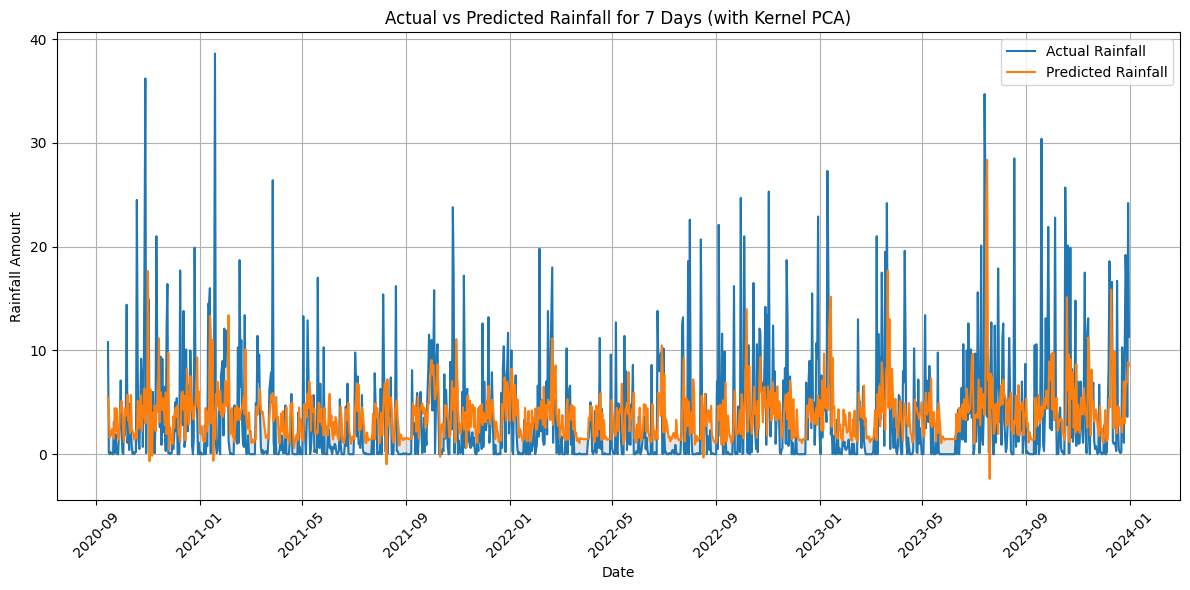


Training and evaluating model with 14 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


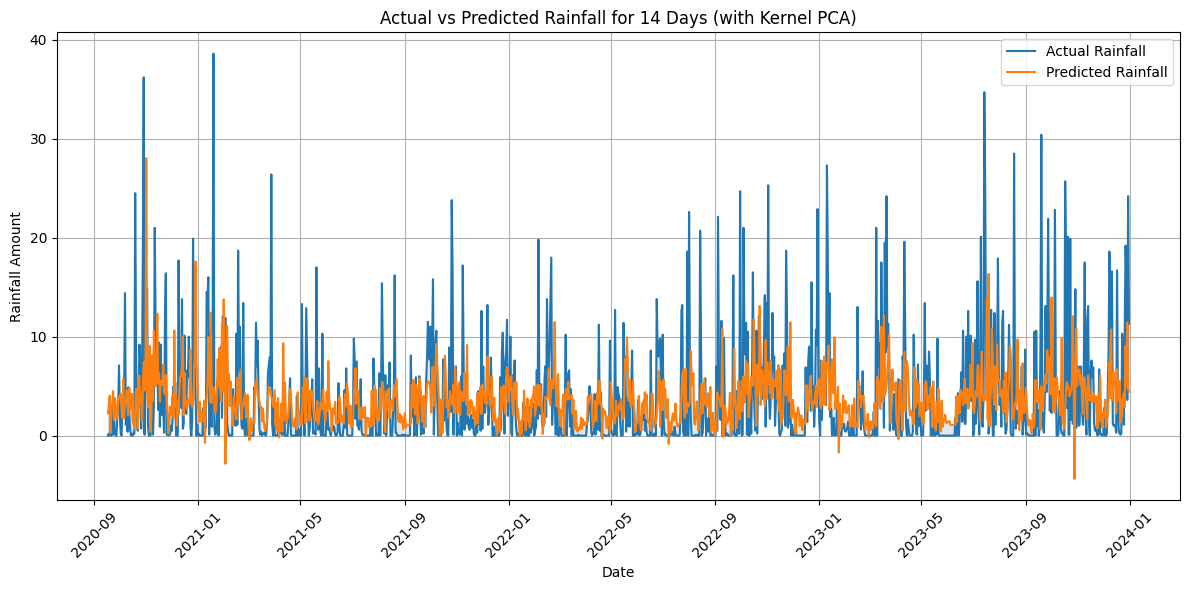


Training and evaluating model with 21 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


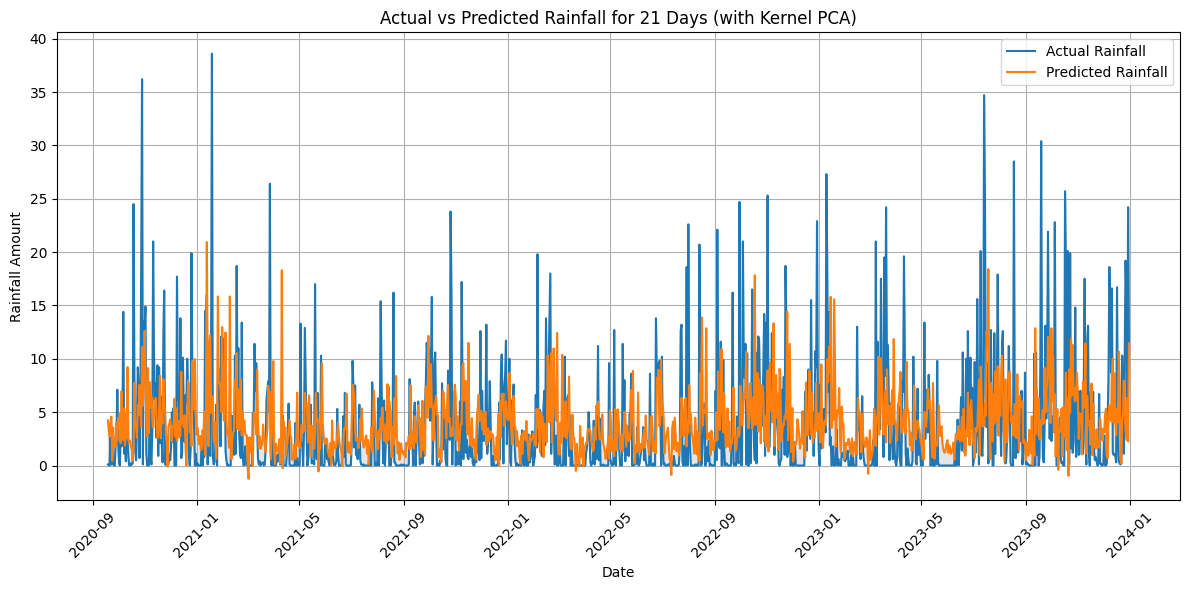


Training and evaluating model with 28 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


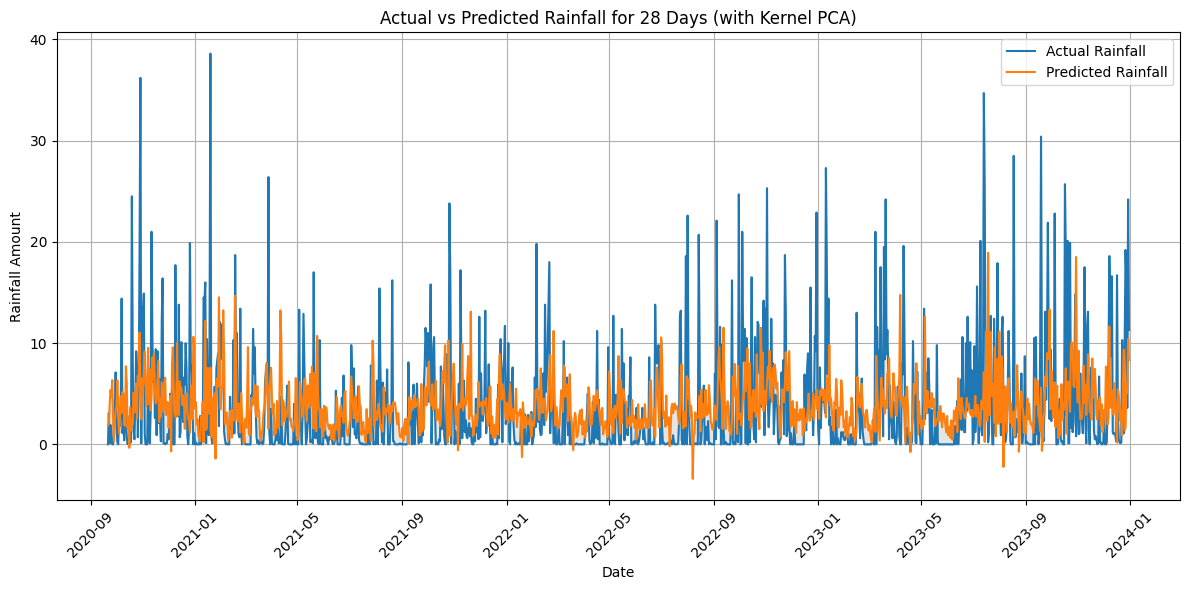

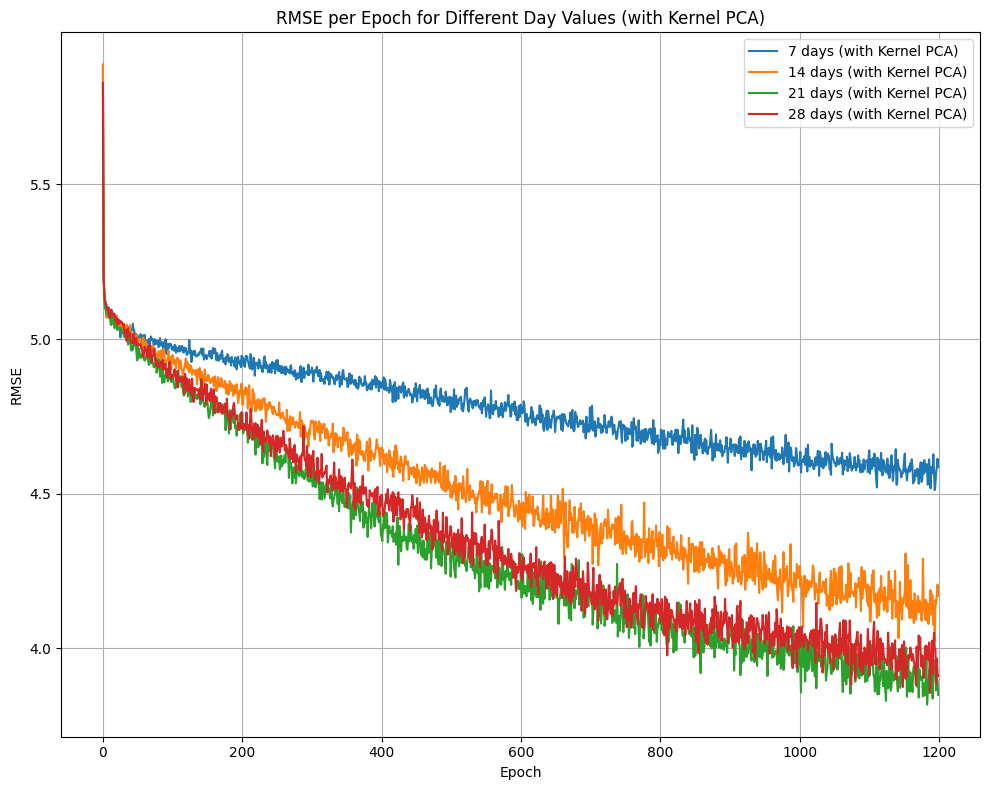

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Initialize a dictionary to store RMSE values for each 'days' value
rmse_per_epoch_per_days = {}

def train_and_evaluate_model(days, original_df):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days+1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days+1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    X_train = train_data[features[:-1]]  # Exclude 'date' as it's the index now
    y_train = train_data[target]
    X_test = test_data[features[:-1]]    # Exclude 'date' as it's the index now
    y_test = test_data[target]

    # Scale the data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Step 3: Apply Kernel PCA
    n_components = min(X_train.shape[1], 15) # Choose a reasonable number of components
    kpca = KernelPCA(n_components=n_components, kernel='rbf', gamma=0.1) # You can experiment with different kernels and gamma
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    # Step 4: Build the Neural Network Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_kpca.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    # Step 5: Train the Model
    history = model.fit(X_train_kpca, y_train, epochs=1200, batch_size=32, verbose=0)

    # Step 6: Evaluate the Model
    y_pred = model.predict(X_test_kpca)
    mse_loss = MeanSquaredError()
    mse = mse_loss(y_test, y_pred)
    rmse = tf.sqrt(mse)

    # Store RMSE values for each epoch in the dictionary
    rmse_per_epoch_per_days[days] = np.sqrt(history.history['loss'])

    # Create a DataFrame for easy plotting
    predictions_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()}, index=test_data.index)

    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Rainfall', color='#1f77b4')
    plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Rainfall', color='#ff7f0e')
    plt.fill_between(predictions_df.index, predictions_df['Actual'], predictions_df['Predicted'], color='gray', alpha=0.2)
    plt.title(f'Actual vs Predicted Rainfall for {days} Days (with Kernel PCA)')
    plt.xlabel('Date')
    plt.ylabel('Rainfall Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define a function to plot all RMSE values
def plot_rmse(rmse_per_epoch_per_days):
    plt.figure(figsize=(10, 8))
    for days, rmse_values in rmse_per_epoch_per_days.items():
        plt.plot(rmse_values, label=f'{days} days (with Kernel PCA)')

    plt.title('RMSE per Epoch for Different Day Values (with Kernel PCA)')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Test the function with different numbers of days
for days in [7, 14,21,28]: # Reduced the number of days for brevity in the example
    print(f"\nTraining and evaluating model with {days} days of previous rain data (with Kernel PCA):")
    train_and_evaluate_model(days, county_galway.copy()) # Pass a copy

# After all models are trained, plot the RMSE values
plot_rmse(rmse_per_epoch_per_days)

Using MAE to measure model performance


Training and evaluating model with 7 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


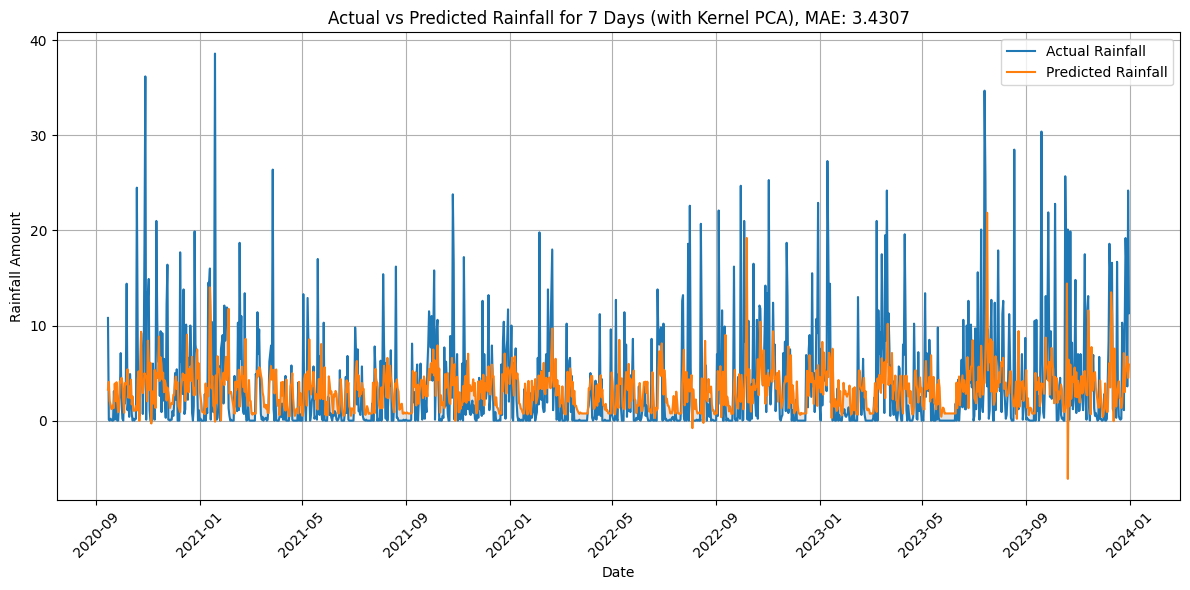


Training and evaluating model with 14 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


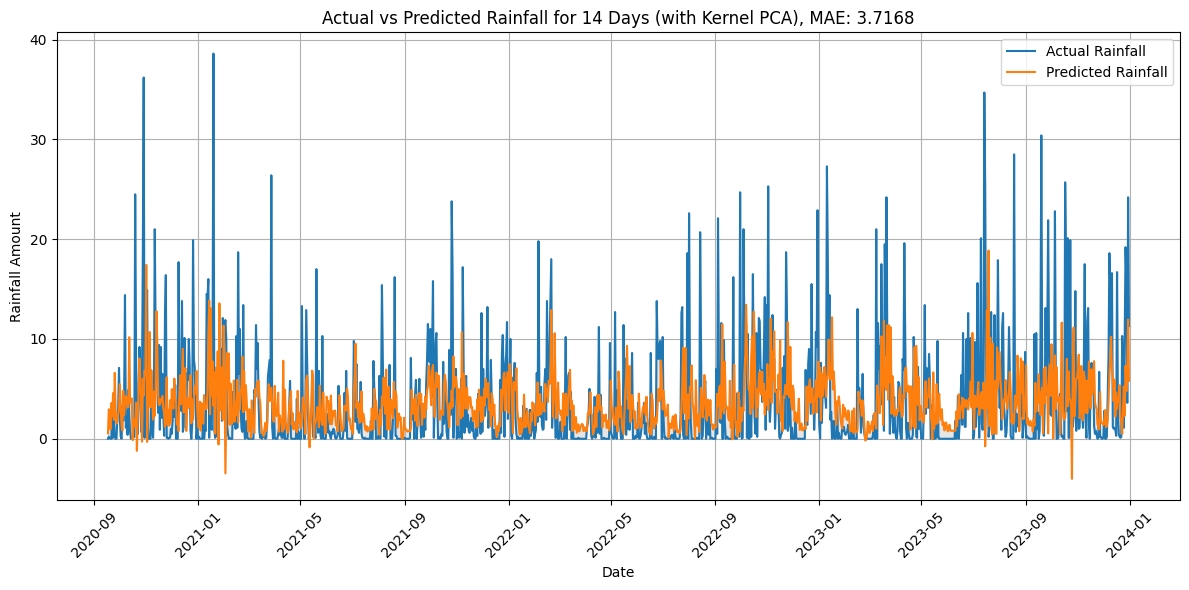


Training and evaluating model with 21 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


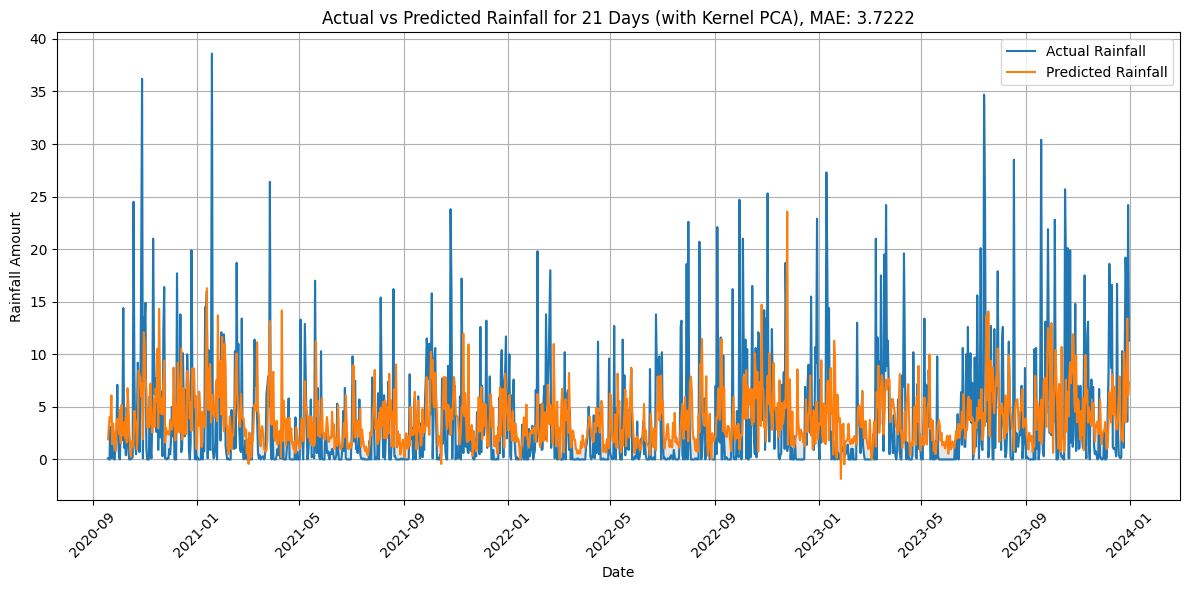


Training and evaluating model with 28 days of previous rain data (with Kernel PCA):


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


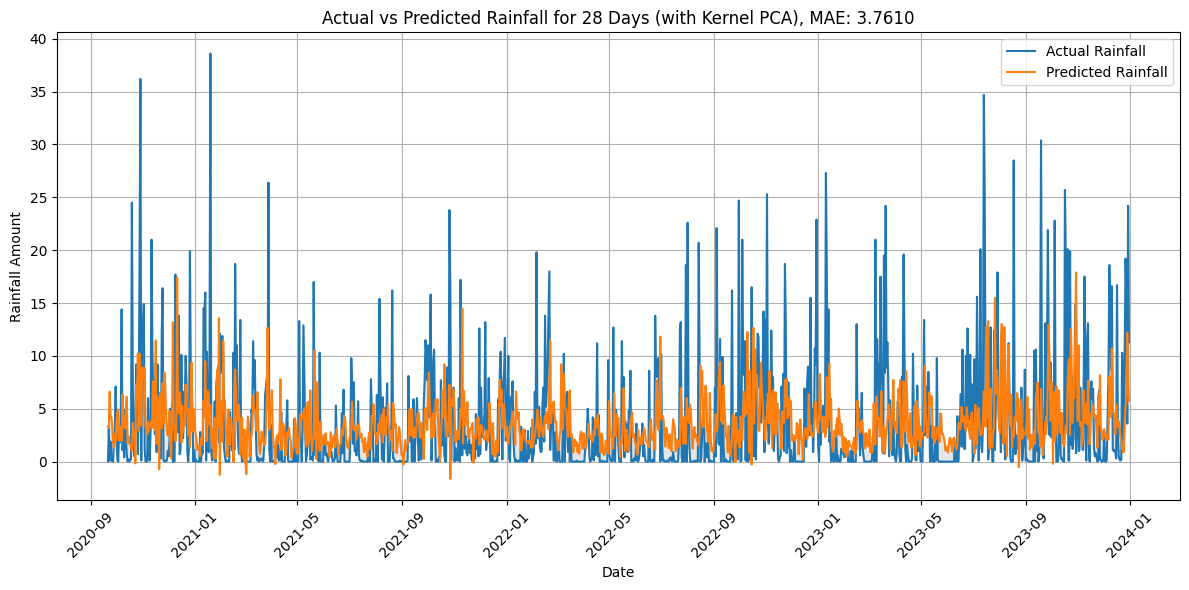

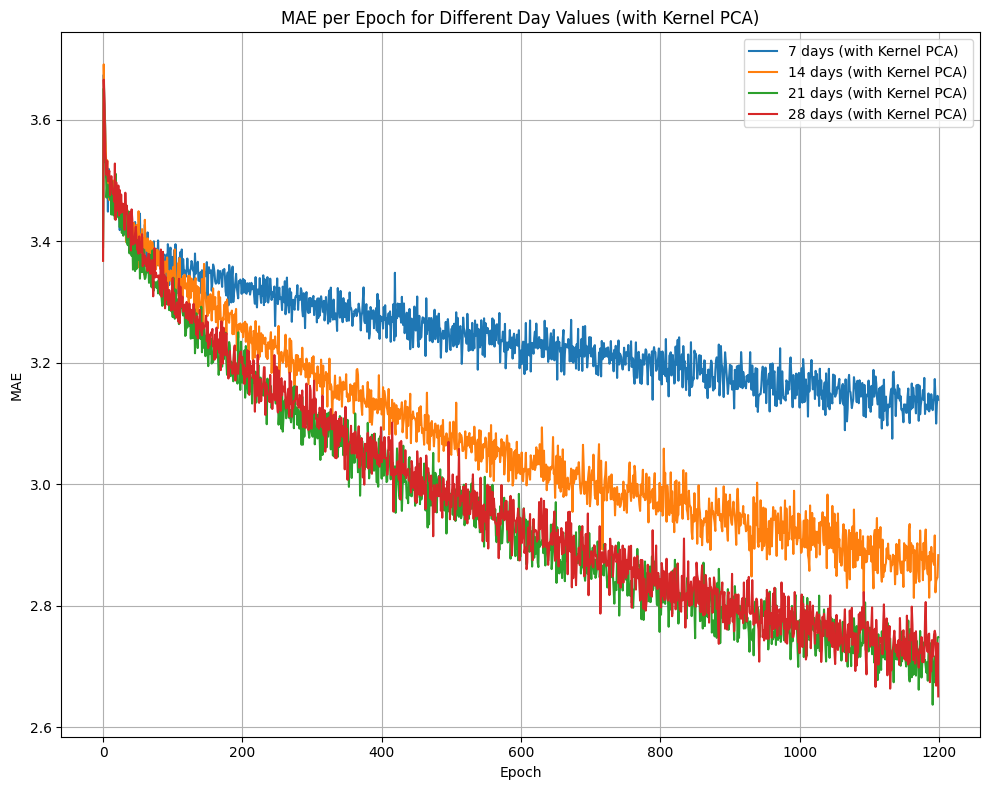

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Initialize a dictionary to store MAE values for each 'days' value
mae_per_epoch_per_days = {}

def train_and_evaluate_model(days, original_df):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days+1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days+1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    X_train = train_data[features[:-1]]  # Exclude 'date' as it's the index now
    y_train = train_data[target]
    X_test = test_data[features[:-1]]    # Exclude 'date' as it's the index now
    y_test = test_data[target]

    # Scale the data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Step 3: Apply Kernel PCA
    n_components = min(X_train.shape[1], 15) # Choose a reasonable number of components
    kpca = KernelPCA(n_components=n_components, kernel='rbf', gamma=0.1) # You can experiment with different kernels and gamma
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    # Step 4: Build the Neural Network Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_kpca.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) # Keep MSE for training, add MAE for evaluation

    # Step 5: Train the Model
    history = model.fit(X_train_kpca, y_train, epochs=1200, batch_size=32, verbose=0)

    # Step 6: Evaluate the Model
    y_pred = model.predict(X_test_kpca)
    mae_loss = MeanAbsoluteError()
    mae = mae_loss(y_test, y_pred)

    # Store MAE values for each epoch in the dictionary
    mae_per_epoch_per_days[days] = history.history['mae'] # Store MAE from history

    # Create a DataFrame for easy plotting
    predictions_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()}, index=test_data.index)

    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Rainfall', color='#1f77b4')
    plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Rainfall', color='#ff7f0e')
    plt.fill_between(predictions_df.index, predictions_df['Actual'], predictions_df['Predicted'], color='gray', alpha=0.2)
    plt.title(f'Actual vs Predicted Rainfall for {days} Days (with Kernel PCA), MAE: {mae:.4f}') # Include MAE in title
    plt.xlabel('Date')
    plt.ylabel('Rainfall Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define a function to plot all MAE values
def plot_mae(mae_per_epoch_per_days):
    plt.figure(figsize=(10, 8))
    for days, mae_values in mae_per_epoch_per_days.items():
        plt.plot(mae_values, label=f'{days} days (with Kernel PCA)')

    plt.title('MAE per Epoch for Different Day Values (with Kernel PCA)')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Test the function with different numbers of days
for days in [7, 14, 21, 28]: 
    print(f"\nTraining and evaluating model with {days} days of previous rain data (with Kernel PCA):")
    train_and_evaluate_model(days, county_galway.copy()) # Pass a copy

# After all models are trained, plot the MAE values
plot_mae(mae_per_epoch_per_days)



Training and evaluating model with n_components = 5:
Epoch 1/1200


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 38.7344 - mae: 3.4287
Epoch 2/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.0586 - mae: 3.7624
Epoch 3/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.3606 - mae: 3.6623
Epoch 4/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.8843 - mae: 3.5752
Epoch 5/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.1353 - mae: 3.5991
Epoch 6/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7464 - mae: 3.3038
Epoch 7/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.2956 - mae: 3.5142
Epoch 8/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.6950 - mae: 3.5853
Epoch 9/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.8720 - mae: 3.5022
Epoch 10/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.4337 - mae: 3.5232
Epoch 11/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.9080 - mae: 3.4856
Epoch 12/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.8157 - mae: 3.4245
Epoch 13/1200
88/88 ━━━━━━

c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 38.0102 - mae: 3.3479
Epoch 2/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.0776 - mae: 3.6845
Epoch 3/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.3769 - mae: 3.4905
Epoch 4/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.3013 - mae: 3.6130
Epoch 5/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.3432 - mae: 3.5389
Epoch 6/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.4865 - mae: 3.3886
Epoch 7/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.6500 - mae: 3.4199
Epoch 8/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.9757 - mae: 3.5778
Epoch 9/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.9226 - mae: 3.5204
Epoch 10/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.1442 - mae: 3.4029
Epoch 11/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.5240 - mae: 3.6657
Epoch 12/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.8888 - mae: 3.2751
Epoch 13/1200
88/88 ━━━━━━

c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 36.2457 - mae: 3.3375
Epoch 2/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.7722 - mae: 3.7746
Epoch 3/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.3207 - mae: 3.5522
Epoch 4/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.1726 - mae: 3.5385
Epoch 5/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.3069 - mae: 3.4418
Epoch 6/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.7202 - mae: 3.4526
Epoch 7/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.2642 - mae: 3.5456
Epoch 8/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.9386 - mae: 3.5296
Epoch 9/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.5194 - mae: 3.4742
Epoch 10/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.5549 - mae: 3.4750
Epoch 11/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.6242 - mae: 3.4277
Epoch 12/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.2345 - mae: 3.5054
Epoch 13/1200
88/88 ━━━━━━

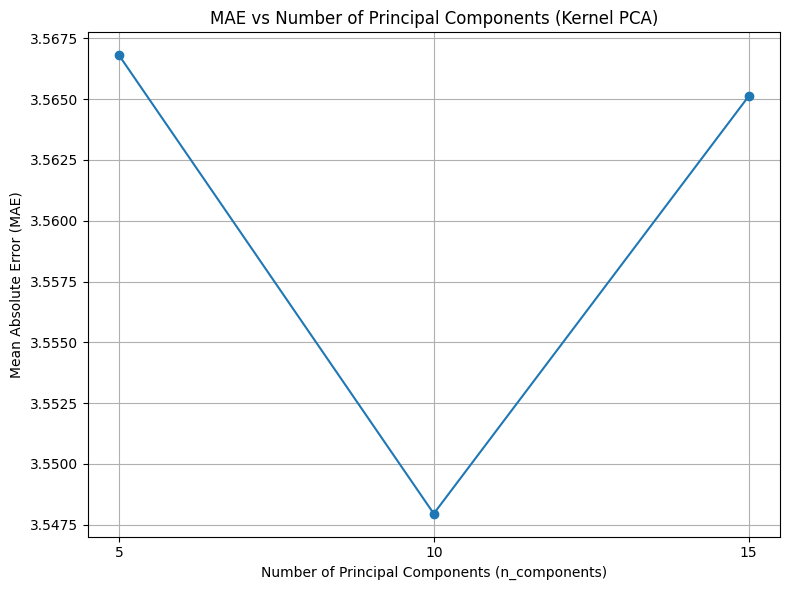

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


# Initialize a dictionary to store MAE values for each n_components
mae_per_n_components = {}

def train_and_evaluate_model(n_components, original_df, days=7):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days+1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days+1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    X_train = train_data[features[:-1]]  # Exclude 'date' as it's the index now
    y_train = train_data[target]
    X_test = test_data[features[:-1]]    # Exclude 'date' as it's the index now
    y_test = test_data[target]

    # Scale the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 3: Apply Kernel PCA
    kpca = KernelPCA(n_components=n_components, kernel='rbf', gamma=0.1) # You can experiment with different kernels and gamma
    X_train_kpca = kpca.fit_transform(X_train_scaled)
    X_test_kpca = kpca.transform(X_test_scaled)

    # Step 4: Build the Neural Network Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_kpca.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) # Keep MSE for training, add MAE for evaluation

    # Step 5: Train the Model
    model.fit(X_train_kpca, y_train, epochs=1200, batch_size=32, verbose=1)

    # Step 6: Evaluate the Model
    y_pred = model.predict(X_test_kpca)
    mae_loss = MeanAbsoluteError()
    mae = mae_loss(y_test, y_pred).numpy() # Get the scalar value

    return mae

# Iterate through different values of n_components
n_components_values = [5, 10, 15]
mae_values = []

for n_comp in n_components_values:
    print(f"\nTraining and evaluating model with n_components = {n_comp}:")
    mae = train_and_evaluate_model(n_comp, county_galway.copy())
    print(f"MAE for n_components = {n_comp}: {mae:.4f}")
    mae_values.append(mae)
    mae_per_n_components[n_comp] = mae

# Plotting the MAE against n_components
plt.figure(figsize=(8, 6))
plt.plot(n_components_values, mae_values, marker='o')
plt.title('MAE vs Number of Principal Components (Kernel PCA)')
plt.xlabel('Number of Principal Components (n_components)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(n_components_values)
plt.grid(True)
plt.tight_layout()
plt.show()


Training and evaluating model with 7 days of previous rain data (with Autoencoder):
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


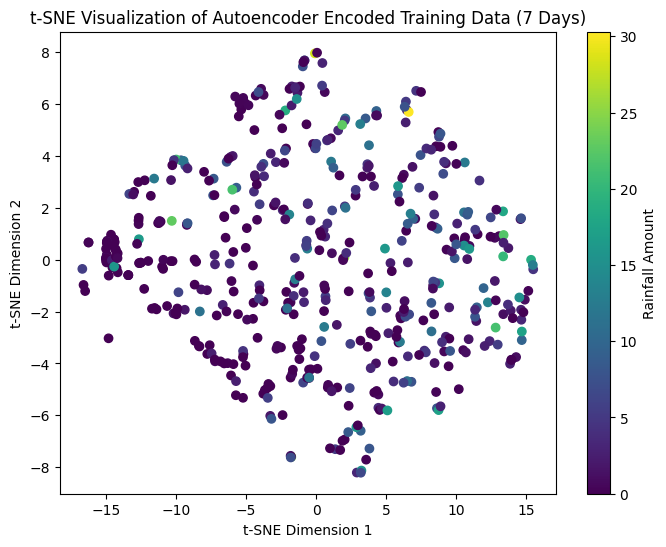

Epoch 1/1200


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33.4299 - mae: 3.3230
Epoch 2/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.7556 - mae: 3.6246
Epoch 3/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.8512 - mae: 3.5238
Epoch 4/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.3031 - mae: 3.5431
Epoch 5/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.1124 - mae: 3.7245
Epoch 6/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.5235 - mae: 3.5784
Epoch 7/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.5675 - mae: 3.4954
Epoch 8/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.4410 - mae: 3.4887
Epoch 9/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.1319 - mae: 3.5616
Epoch 10/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.8995 - mae: 3.4512
Epoch 11/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.1089 - mae: 3.4052
Epoch 12/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.3394 - mae: 3.7240
Epoch 13/1200
88/88 ━━━━━━

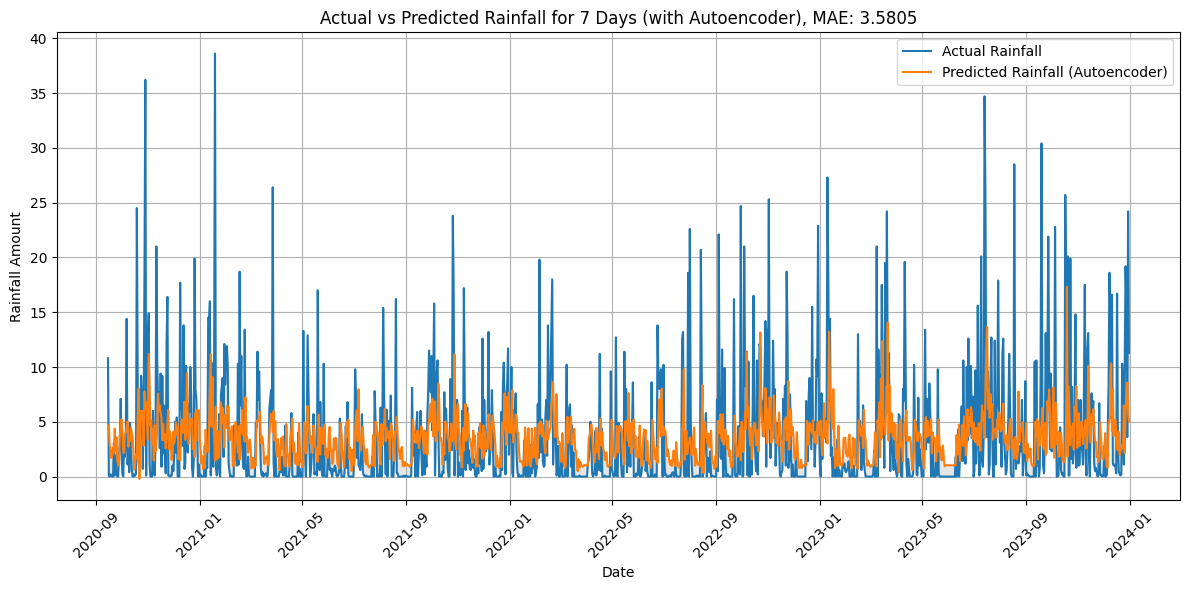


Training and evaluating model with 14 days of previous rain data (with Autoencoder):
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


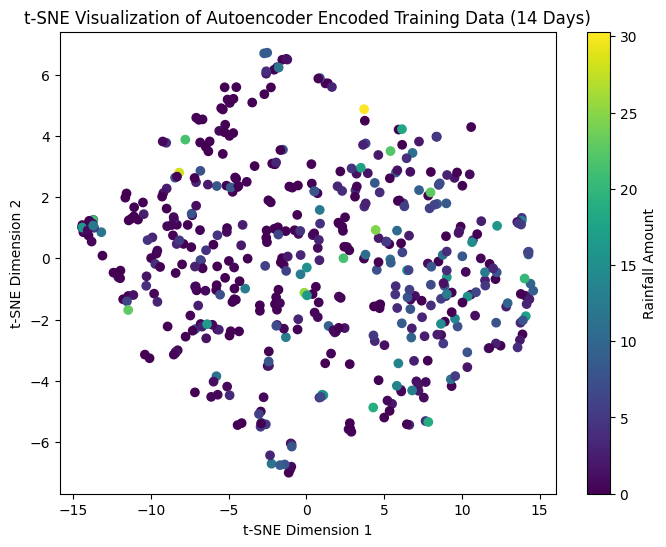

Epoch 1/1200


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34.5816 - mae: 3.4924
Epoch 2/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.3204 - mae: 3.4045
Epoch 3/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.9513 - mae: 3.5413
Epoch 4/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.3196 - mae: 3.5975
Epoch 5/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.7615 - mae: 3.7295
Epoch 6/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.3593 - mae: 3.6198
Epoch 7/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.7625 - mae: 3.6840
Epoch 8/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.9459 - mae: 3.6280
Epoch 9/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.5348 - mae: 3.7099
Epoch 10/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.4039 - mae: 3.5891
Epoch 11/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28.0494 - mae: 3.6369
Epoch 12/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.5904 - mae: 3.6514
Epoch 13/1200
88/88 ━━━━━━

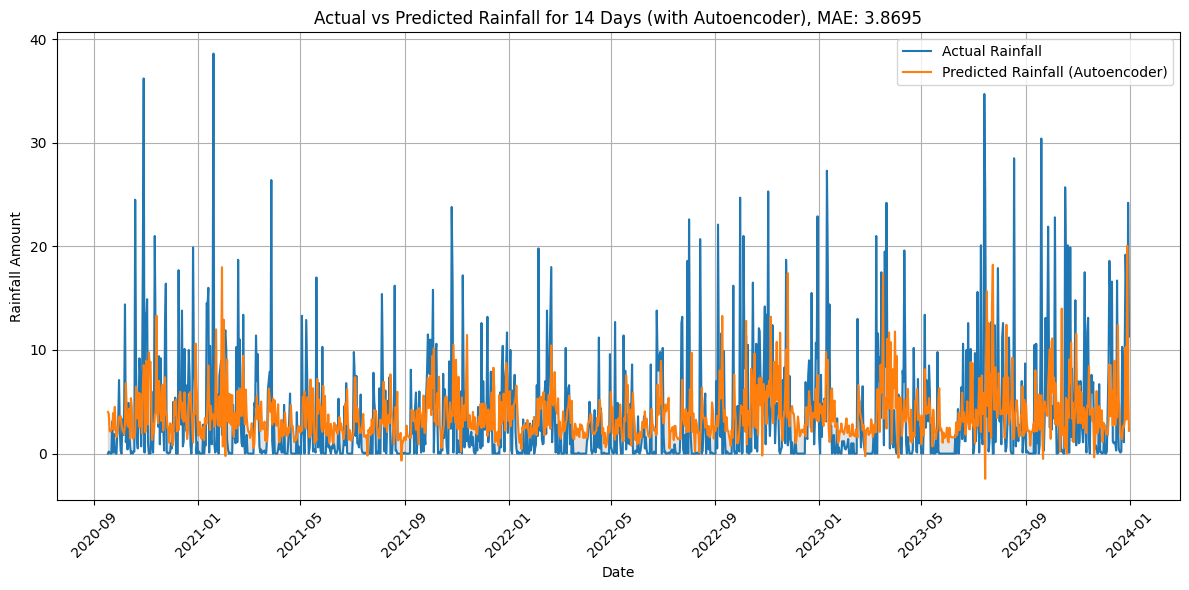


Training and evaluating model with 21 days of previous rain data (with Autoencoder):
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


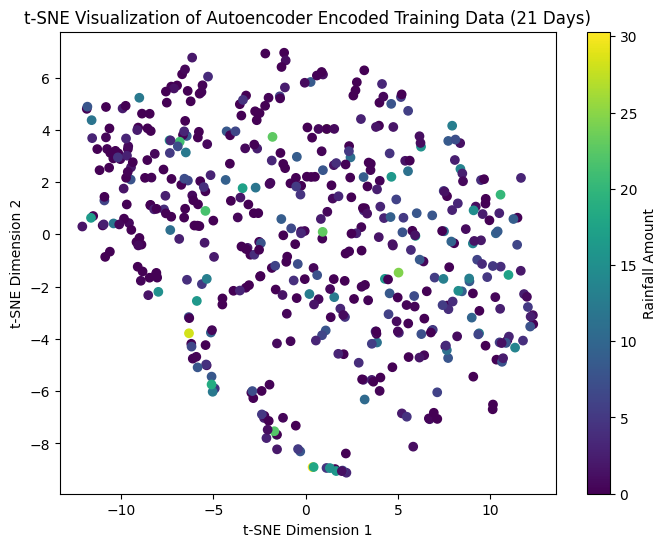

Epoch 1/1200


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 29.4145 - mae: 3.2096
Epoch 2/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.8807 - mae: 3.6554
Epoch 3/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.1165 - mae: 3.5561
Epoch 4/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.7938 - mae: 3.6059
Epoch 5/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.6169 - mae: 3.5759
Epoch 6/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.3553 - mae: 3.8235
Epoch 7/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.5714 - mae: 3.6322
Epoch 8/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.4388 - mae: 3.5046
Epoch 9/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.6202 - mae: 3.4197
Epoch 10/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.0161 - mae: 3.5280
Epoch 11/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.9604 - mae: 3.7428
Epoch 12/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.9885 - mae: 3.5516
Epoch 13/1200
88/88 ━━━━━━

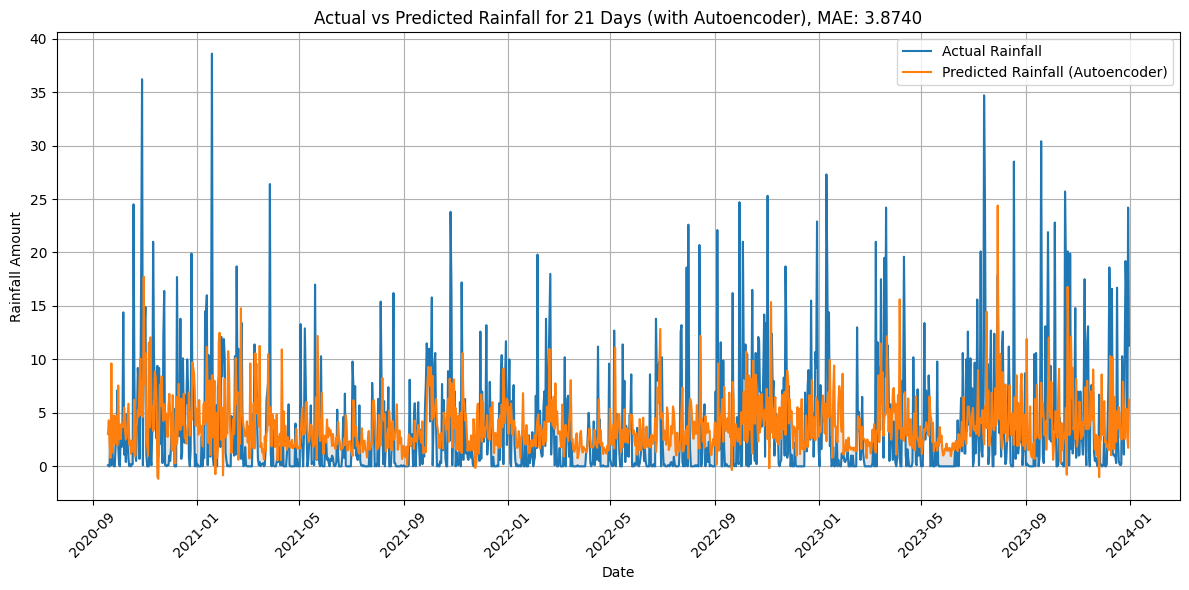


Training and evaluating model with 28 days of previous rain data (with Autoencoder):
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


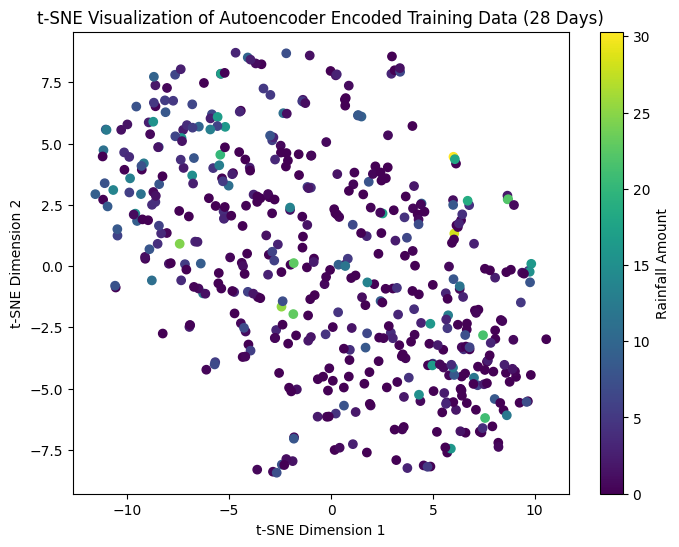

Epoch 1/1200


c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 31.9671 - mae: 3.3721
Epoch 2/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.8558 - mae: 3.7378
Epoch 3/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.0064 - mae: 3.6300
Epoch 4/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.5553 - mae: 3.7065
Epoch 5/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.3863 - mae: 3.7109
Epoch 6/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.4177 - mae: 3.6886
Epoch 7/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.1678 - mae: 3.6860
Epoch 8/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.5729 - mae: 3.5063
Epoch 9/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.5668 - mae: 3.7451
Epoch 10/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.5682 - mae: 3.5632
Epoch 11/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.2407 - mae: 3.6625
Epoch 12/1200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.8844 - mae: 3.6646
Epoch 13/1200
88/88 ━━━━━━

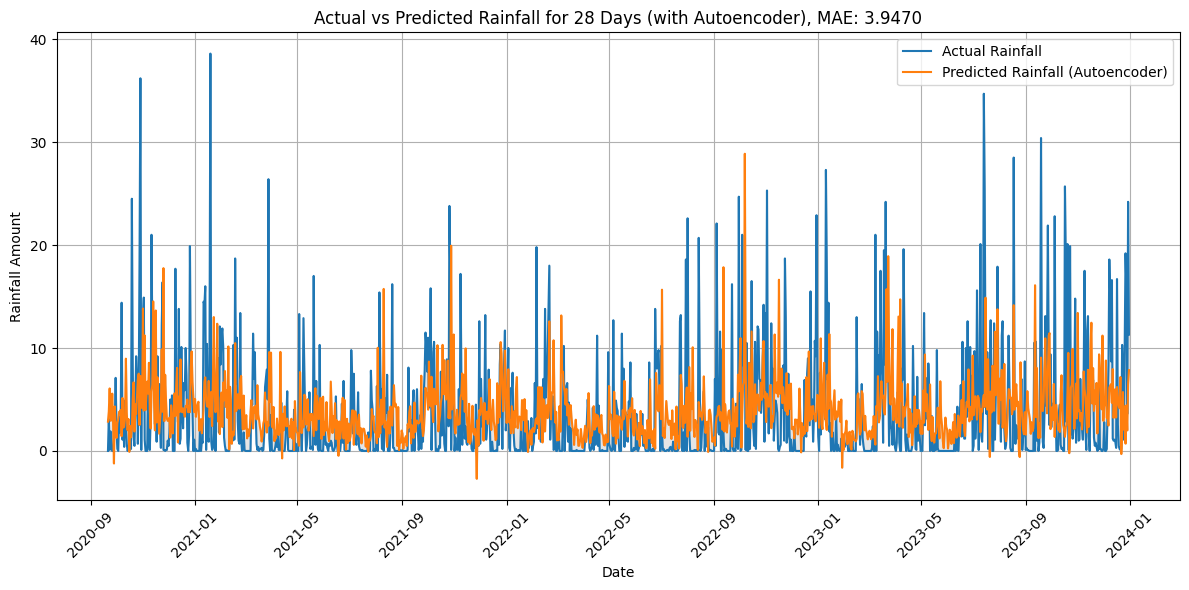

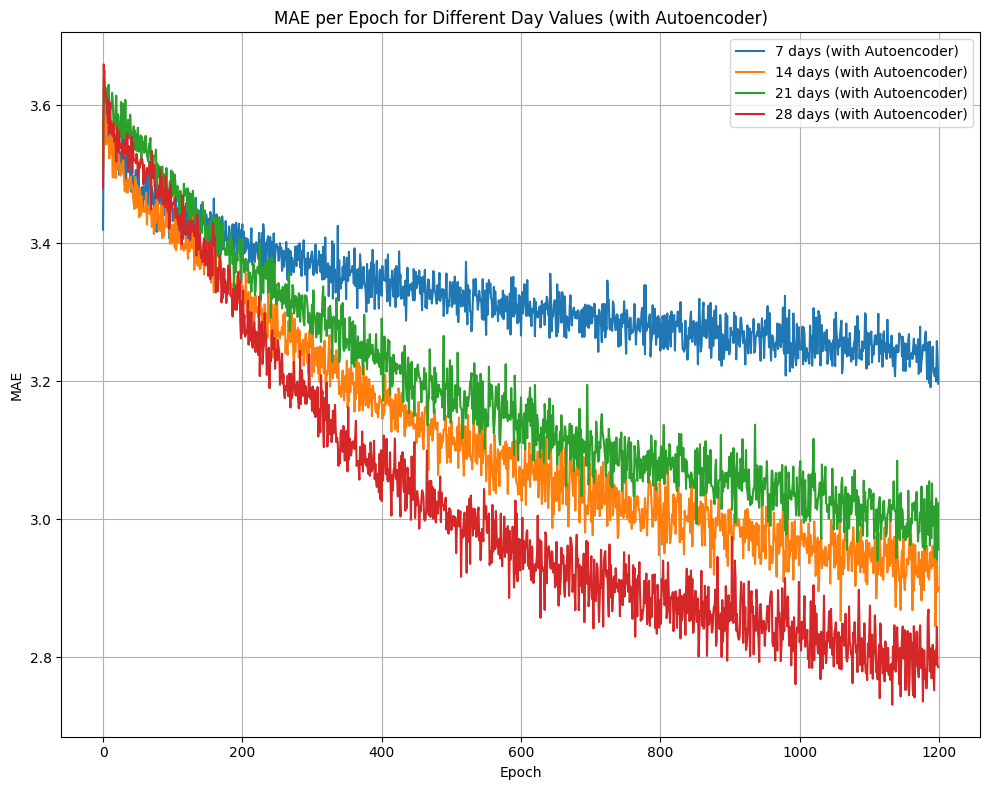

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
import matplotlib.pyplot as plt

# Initialize a dictionary to store MAE values for each 'days' value
mae_per_epoch_per_days_autoencoder = {}

def create_autoencoder(input_dim, encoding_dim=15):
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(64, activation='relu')(input_layer)
    encoder = Dense(32, activation='relu')(encoder)
    encoder = Dense(encoding_dim, activation='relu')(encoder)  # Bottleneck layer

    decoder = Dense(32, activation='relu')(encoder)
    decoder = Dense(64, activation='relu')(decoder)
    decoder = Dense(input_dim, activation='linear')(decoder)  # Output layer

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    encoder_model = Model(inputs=input_layer, outputs=encoder)
    return autoencoder, encoder_model

def train_and_evaluate_model_autoencoder(days, original_df):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days+1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days+1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    X_train = train_data[features[:-1]]  # Exclude 'date' as it's the index now
    y_train = train_data[target]
    X_test = test_data[features[:-1]]    # Exclude 'date' as it's the index now
    y_test = test_data[target]

    # Scale the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 3: Apply Autoencoder for Dimensionality Reduction
    input_dim = X_train_scaled.shape[1]
    encoding_dim = min(input_dim, 15)  # Choose a reasonable number of components
    autoencoder, encoder_model = create_autoencoder(input_dim, encoding_dim)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(X_train_scaled, X_train_scaled, epochs=200, batch_size=32, verbose=0) # Train the autoencoder
    X_train_encoded = encoder_model.predict(X_train_scaled)
    X_test_encoded = encoder_model.predict(X_test_scaled)

    # Step 4: Apply t-SNE for Visualization of Encoded Data (on a subset for speed if needed)
    tsne = TSNE(n_components=2, random_state=42, n_iter=300)
    X_train_tsne = tsne.fit_transform(X_train_encoded[:min(len(X_train_encoded), 500)]) # Visualize a subset for large datasets
    y_train_subset = y_train[:min(len(y_train), 500)]

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train_subset, cmap='viridis')
    plt.colorbar(scatter, label='Rainfall Amount')
    plt.title(f't-SNE Visualization of Autoencoder Encoded Training Data ({days} Days)')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()

    # Step 5: Build the Neural Network Model using Encoded Data
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_encoded.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) # Keep MSE for training, add MAE for evaluation

    # Step 6: Train the Model
    history = model.fit(X_train_encoded, y_train, epochs=1200, batch_size=32, verbose=1)

    # Step 7: Evaluate the Model
    y_pred = model.predict(X_test_encoded)
    mae_loss = MeanAbsoluteError()
    mae = mae_loss(y_test, y_pred)

    # Store MAE values for each epoch in the dictionary
    mae_per_epoch_per_days_autoencoder[days] = history.history['mae'] # Store MAE from history

    # Create a DataFrame for easy plotting
    predictions_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()}, index=test_data.index)

    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Rainfall', color='#1f77b4')
    plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Rainfall (Autoencoder)', color='#ff7f0e')
    plt.fill_between(predictions_df.index, predictions_df['Actual'], predictions_df['Predicted'], color='gray', alpha=0.2)
    plt.title(f'Actual vs Predicted Rainfall for {days} Days (with Autoencoder), MAE: {mae:.4f}') # Include MAE in title
    plt.xlabel('Date')
    plt.ylabel('Rainfall Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define a function to plot all MAE values for Autoencoder
def plot_mae_autoencoder(mae_per_epoch_per_days_autoencoder):
    plt.figure(figsize=(10, 8))
    for days, mae_values in mae_per_epoch_per_days_autoencoder.items():
        plt.plot(mae_values, label=f'{days} days (with Autoencoder)')

    plt.title('MAE per Epoch for Different Day Values (with Autoencoder)')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Test the function with different numbers of days
for days in [7, 14, 21, 28]:
    print(f"\nTraining and evaluating model with {days} days of previous rain data (with Autoencoder):")
    train_and_evaluate_model_autoencoder(days, county_galway.copy()) # Pass a copy

# After all models are trained, plot the MAE values for Autoencoder
plot_mae_autoencoder(mae_per_epoch_per_days_autoencoder)

In [15]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Testing with Prophet Model 

c:\Users\meatefza\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.



Training and evaluating model with 7 days of previous rain data:


01:17:04 - cmdstanpy - INFO - Chain [1] start processing
01:17:06 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 7 days: 5.5043304093195955


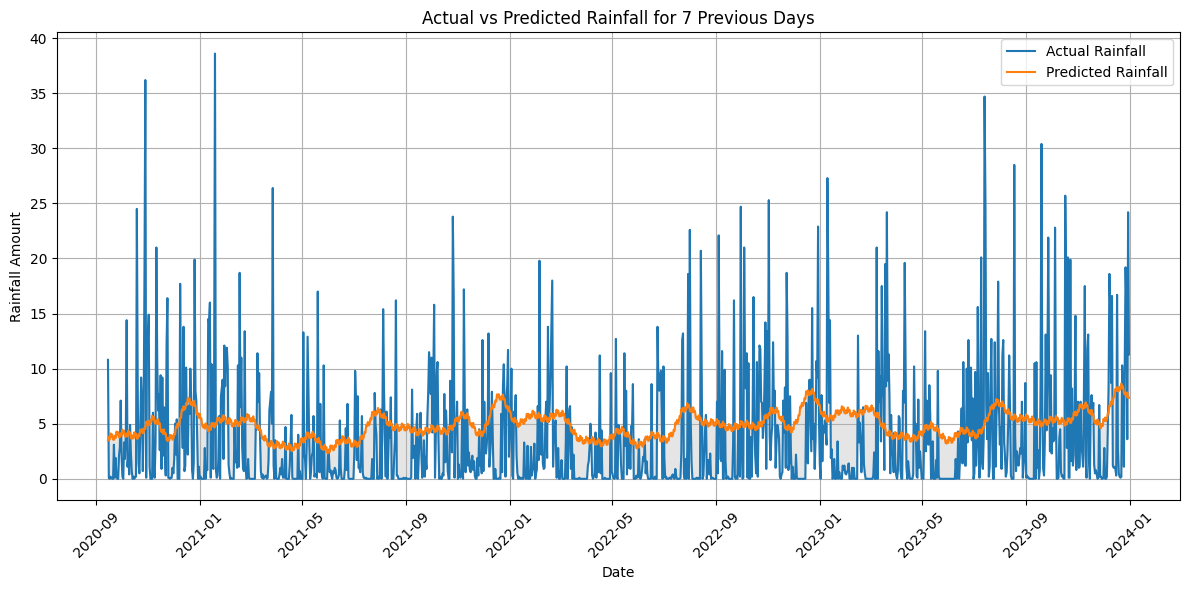


Training and evaluating model with 14 days of previous rain data:


01:17:08 - cmdstanpy - INFO - Chain [1] start processing
01:17:08 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 14 days: 5.514848185027651


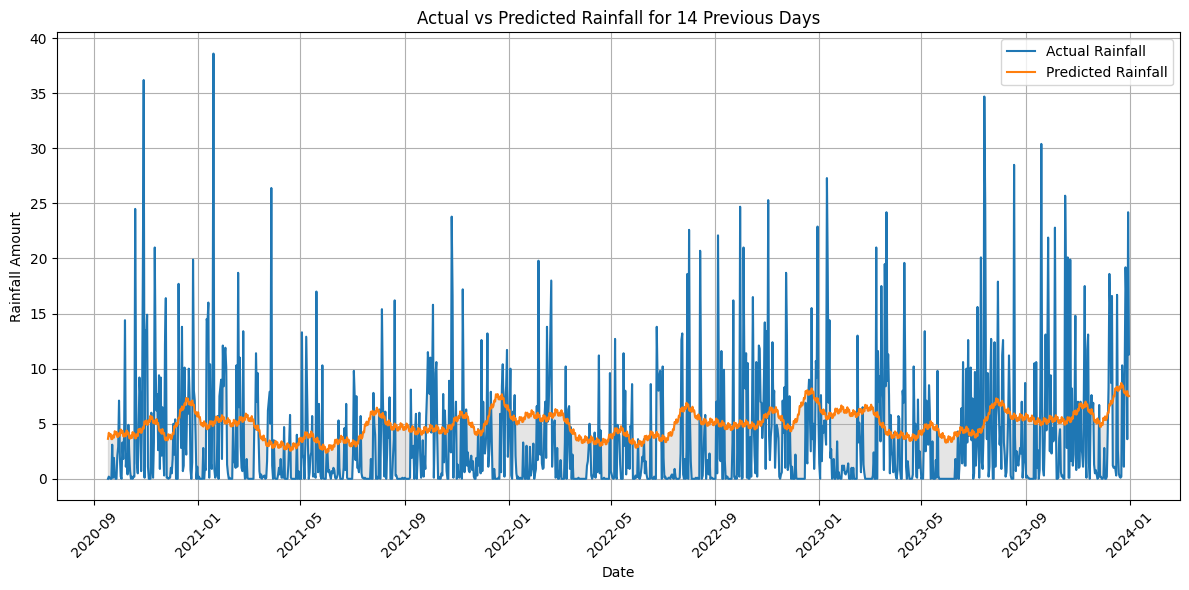


Training and evaluating model with 21 days of previous rain data:


01:17:10 - cmdstanpy - INFO - Chain [1] start processing
01:17:10 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 21 days: 5.495677807477533


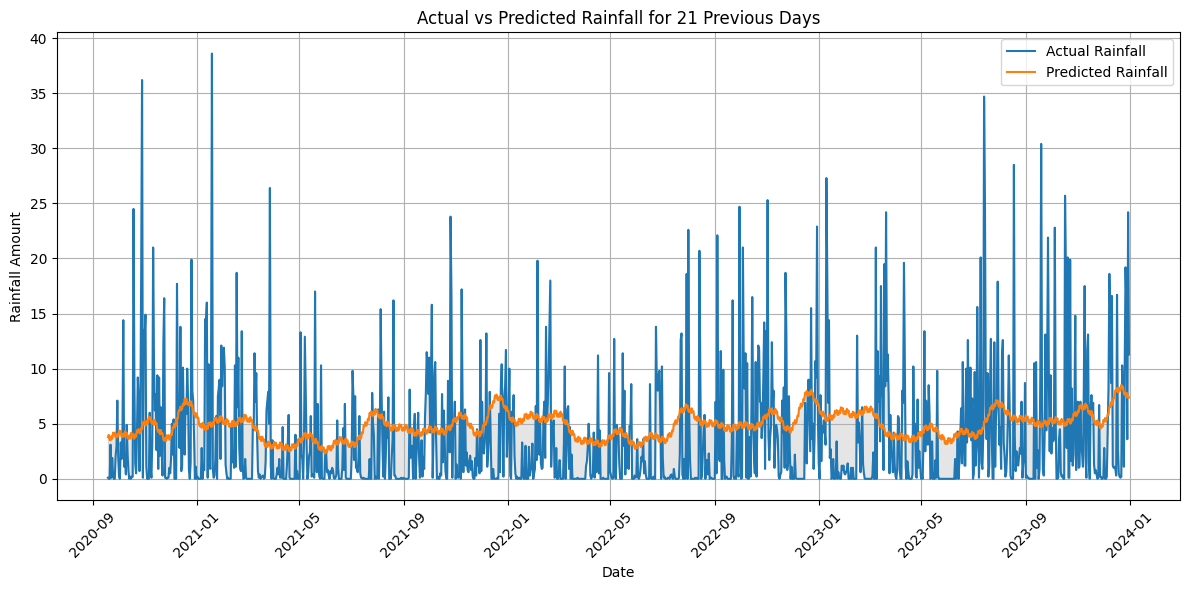


Training and evaluating model with 28 days of previous rain data:


01:17:12 - cmdstanpy - INFO - Chain [1] start processing
01:17:12 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 28 days: 5.499021276804105


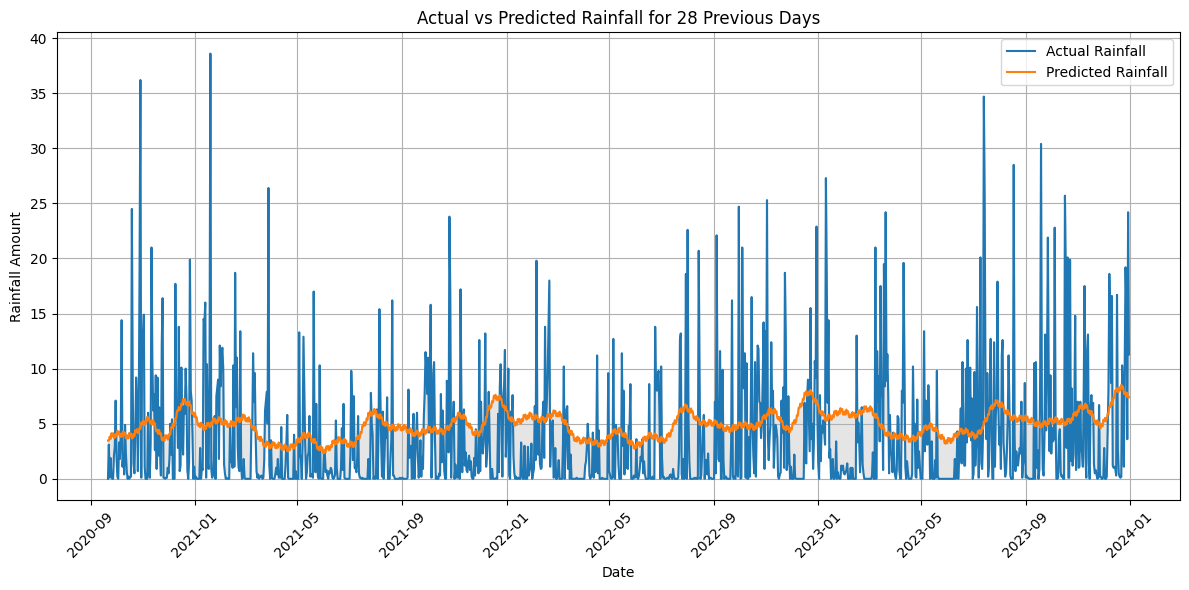

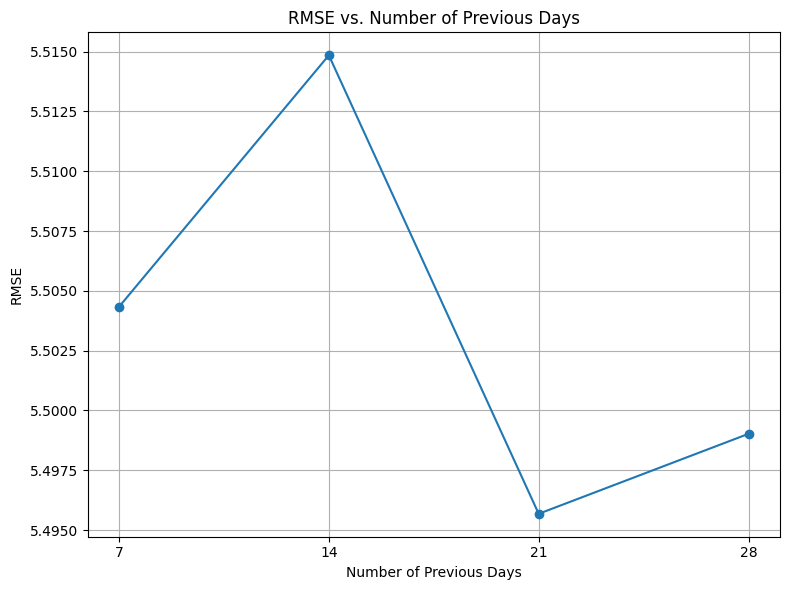

In [16]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

rmse_per_num_previous_days = {}  # Dictionary to store RMSE values

def train_and_evaluate_model(days, original_df):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days + 1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days + 1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    # Prepare data for Prophet model
    train_data_prophet = train_data.reset_index()[['date', target]].rename(columns={'date': 'ds', target: 'y'})
    test_data_prophet = test_data.reset_index()[['date', target]].rename(columns={'date': 'ds', target: 'y'})

    # Step 3: Build the Prophet Model
    model = Prophet()

    # Step 4: Train the Model
    model.fit(train_data_prophet)

    # Step 5: Make Predictions
    future = model.make_future_dataframe(periods=len(test_data_prophet))
    forecast = model.predict(future)

    # Extract the predicted values for the test set
    y_pred = forecast.loc[forecast['ds'].isin(test_data_prophet['ds']), 'yhat'].values

    # Calculate RMSE
    rmse = np.sqrt(np.mean((test_data_prophet['y'].values - y_pred) ** 2))

    # Store RMSE values for each number of previous days
    rmse_per_num_previous_days[days] = rmse
    print(f"RMSE for {days} days: {rmse}")  # Added this line
    # Create a DataFrame for easy plotting of individual predictions
    predictions_df = pd.DataFrame({'Actual': test_data_prophet['y'].values.flatten(), 'Predicted': y_pred.flatten()}, index=test_data.index)

    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Rainfall', color='#1f77b4')
    plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Rainfall', color='#ff7f0e')
    plt.fill_between(predictions_df.index, predictions_df['Actual'], predictions_df['Predicted'], color='gray', alpha=0.2)
    plt.title(f'Actual vs Predicted Rainfall for {days} Previous Days')
    plt.xlabel('Date')
    plt.ylabel('Rainfall Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define a function to plot all RMSE values
def plot_rmse_values(rmse_dict):
    """
    Plots the RMSE values for different numbers of previous days used in the model.

    Args:
        rmse_dict (dict): A dictionary where keys are the number of previous days
                          and values are the corresponding RMSE.
    """
    days = list(rmse_dict.keys())
    rmse_values = list(rmse_dict.values())

    plt.figure(figsize=(8, 6))
    plt.plot(days, rmse_values, marker='o', linestyle='-')
    plt.title('RMSE vs. Number of Previous Days')
    plt.xlabel('Number of Previous Days')
    plt.ylabel('RMSE')
    plt.xticks(days)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Test the function with different numbers of days
num_previous_days_to_test = [7,14,21,28]
for days in num_previous_days_to_test:
    print(f"\nTraining and evaluating model with {days} days of previous rain data:")
    train_and_evaluate_model(days, county_galway.copy()) # Pass a copy

# Plot RMSE values
plot_rmse_values(rmse_per_num_previous_days)

Applying Kernel PCA with Prophet


Training and evaluating model with 7 days of previous rain data:


01:17:14 - cmdstanpy - INFO - Chain [1] start processing
01:17:15 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 7 days: 5.5043304093195955


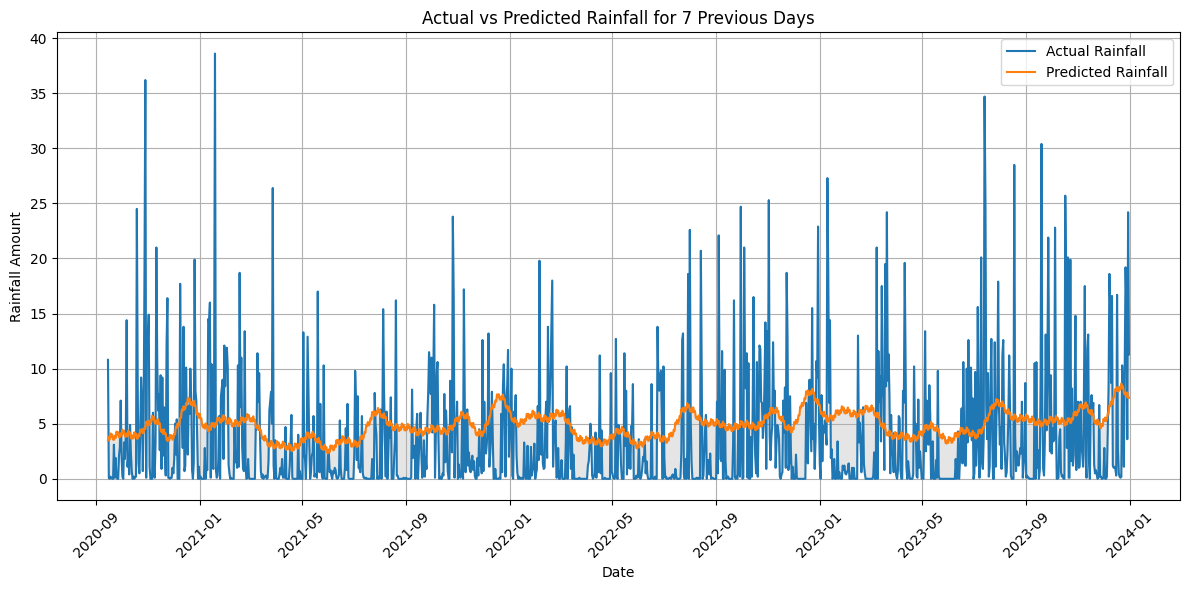


Training and evaluating model with 14 days of previous rain data:


01:17:19 - cmdstanpy - INFO - Chain [1] start processing
01:17:19 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 14 days: 5.514848185027651


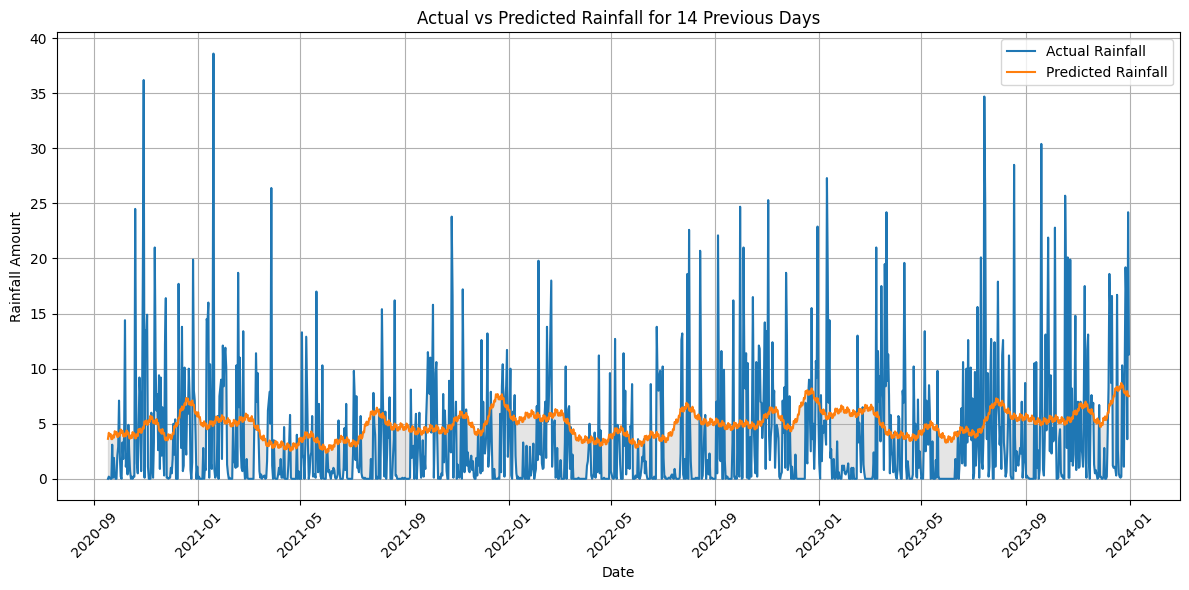


Training and evaluating model with 21 days of previous rain data:


01:17:24 - cmdstanpy - INFO - Chain [1] start processing
01:17:24 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 21 days: 5.495677807477533


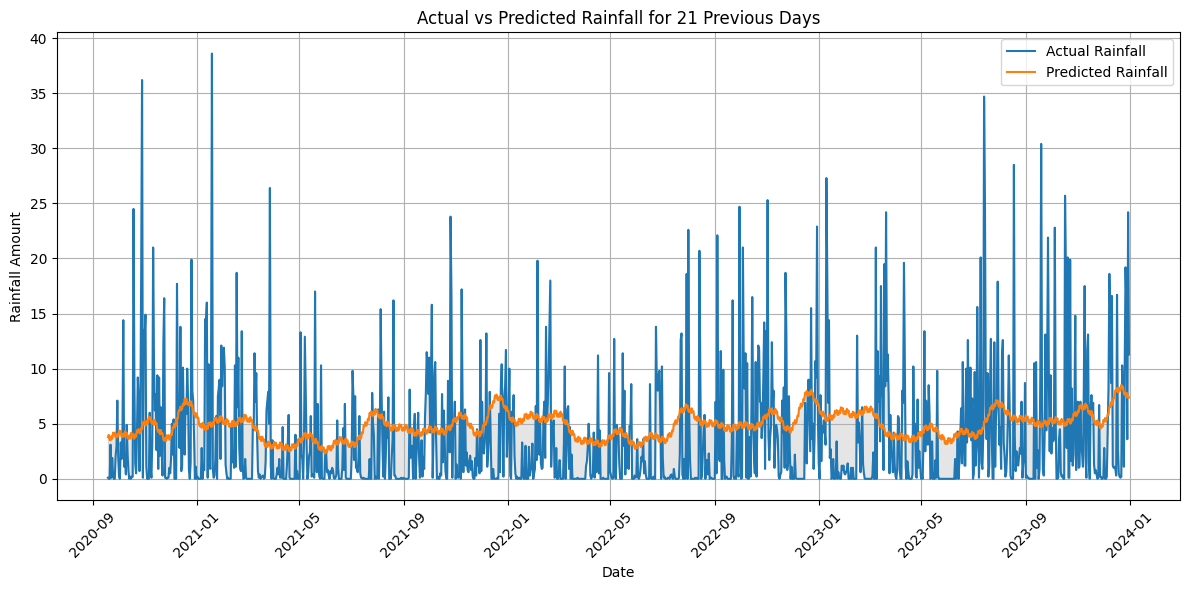


Training and evaluating model with 28 days of previous rain data:


01:17:28 - cmdstanpy - INFO - Chain [1] start processing
01:17:28 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 28 days: 5.499021276804105


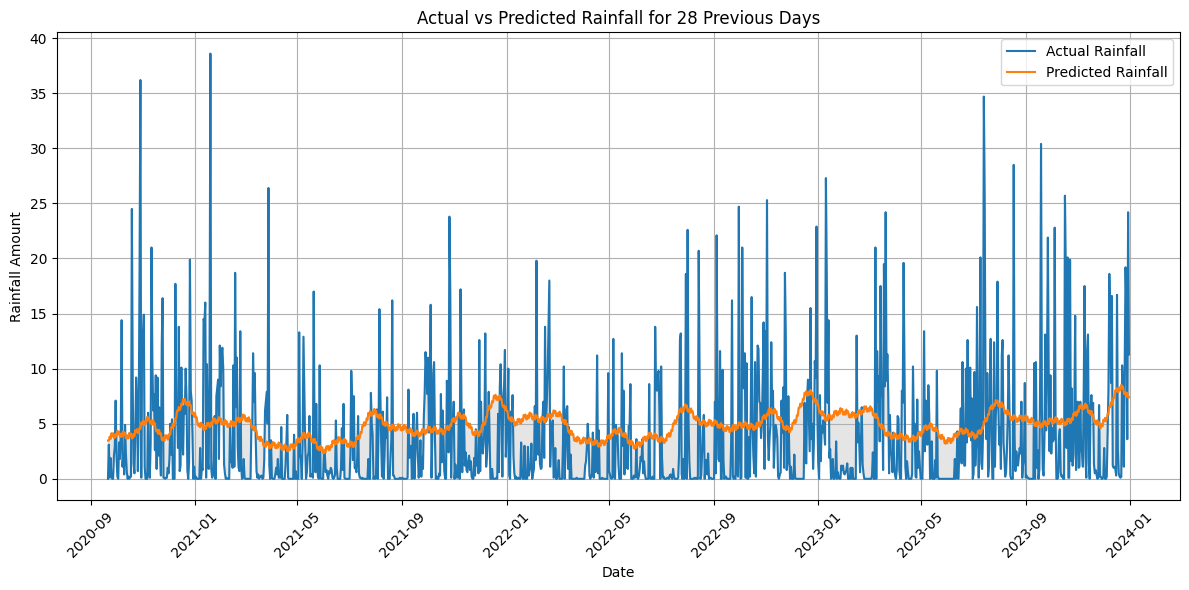

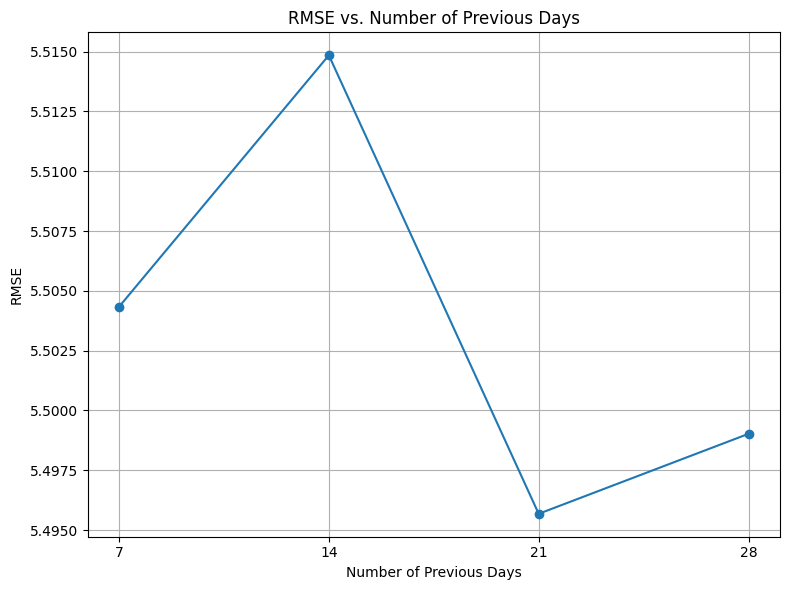

In [17]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import KernelPCA

rmse_per_num_previous_days = {}  # Dictionary to store RMSE values

def train_and_evaluate_model(days, original_df):
    # Step 1: Prepare the Data
    df = original_df.copy()
    # Create rain_previous_day columns
    for i in range(1, days + 1):
        df[f'rain_previous_day_{i}'] = df['rain'].shift(i)

    # Extract relevant features and target variable
    features = [f'rain_previous_day_{i}' for i in range(1, days + 1)] + ['date']
    target = 'rain'
    data = df[features + [target]].copy()

    # Convert date to datetime objects
    data['date'] = pd.to_datetime(data['date'])

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Step 2: Split the Data
    # Set the 'date' column as index for chronological splitting
    data.set_index('date', inplace=True)
    train_size = int(len(data) * 0.7)
    train_data = data[:train_size]
    test_data = data[train_size:]

    # Apply Kernel PCA
    kpca = KernelPCA(kernel='rbf', n_components=days)
    train_data_kpca = kpca.fit_transform(train_data.drop(columns=[target]))
    test_data_kpca = kpca.transform(test_data.drop(columns=[target]))

    # Prepare data for Prophet model
    train_data_prophet = pd.DataFrame(train_data_kpca, index=train_data.index, columns=[f'kpca_{i}' for i in range(days)])
    train_data_prophet[target] = train_data[target].values
    train_data_prophet.reset_index(inplace=True)
    train_data_prophet.rename(columns={'date': 'ds', target: 'y'}, inplace=True)

    test_data_prophet = pd.DataFrame(test_data_kpca, index=test_data.index, columns=[f'kpca_{i}' for i in range(days)])
    test_data_prophet[target] = test_data[target].values
    test_data_prophet.reset_index(inplace=True)
    test_data_prophet.rename(columns={'date': 'ds', target: 'y'}, inplace=True)

    # Step 3: Build the Prophet Model
    model = Prophet()

    # Step 4: Train the Model
    model.fit(train_data_prophet)

    # Step 5: Make Predictions
    future = model.make_future_dataframe(periods=len(test_data_prophet))
    forecast = model.predict(future)

    # Extract the predicted values for the test set
    y_pred = forecast.loc[forecast['ds'].isin(test_data_prophet['ds']), 'yhat'].values

    # Calculate RMSE
    rmse = np.sqrt(np.mean((test_data_prophet['y'].values - y_pred) ** 2))

    # Store RMSE values for each number of previous days
    rmse_per_num_previous_days[days] = rmse
    print(f"RMSE for {days} days: {rmse}")  # Added this line
    # Create a DataFrame for easy plotting of individual predictions
    predictions_df = pd.DataFrame({'Actual': test_data_prophet['y'].values.flatten(), 'Predicted': y_pred.flatten()}, index=test_data.index)

    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Rainfall', color='#1f77b4')
    plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Rainfall', color='#ff7f0e')
    plt.fill_between(predictions_df.index, predictions_df['Actual'], predictions_df['Predicted'], color='gray', alpha=0.2)
    plt.title(f'Actual vs Predicted Rainfall for {days} Previous Days')
    plt.xlabel('Date')
    plt.ylabel('Rainfall Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define a function to plot all RMSE values
def plot_rmse_values(rmse_dict):
    """
    Plots the RMSE values for different numbers of previous days used in the model.

    Args:
        rmse_dict (dict): A dictionary where keys are the number of previous days
                          and values are the corresponding RMSE.
    """
    days = list(rmse_dict.keys())
    rmse_values = list(rmse_dict.values())

    plt.figure(figsize=(8, 6))
    plt.plot(days, rmse_values, marker='o', linestyle='-')
    plt.title('RMSE vs. Number of Previous Days')
    plt.xlabel('Number of Previous Days')
    plt.ylabel('RMSE')
    plt.xticks(days)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Test the function with different numbers of days
num_previous_days_to_test = [7,14,21,28]
for days in num_previous_days_to_test:
    print(f"\nTraining and evaluating model with {days} days of previous rain data:")
    train_and_evaluate_model(days, county_galway.copy()) # Pass a copy

# Plot RMSE values
plot_rmse_values(rmse_per_num_previous_days)
